In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API-KEY")
project = rf.workspace("tammy").project("bike_accident")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bike_accident-3 in yolov8:: 100%|██████████| 1656/1656 [00:00<00:00, 6475.47it/s]


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 44.6 MB/s eta 0:00:00


In [ ]:

!ls /content/bike_accident-3/


data.yaml  README.dataset.txt  README.roboflow.txt  train


In [ ]:
ls /content/bike_accident-3

data.yaml  README.dataset.txt  README.roboflow.txt  train/


In [ ]:
import os
import shutil
import random


train_path = '/content/bike_accident-3/train/images'
labels_path = '/content/bike_accident-3/train/labels'
val_images_path = '/content/bike_accident-3/valid/images'
val_labels_path = '/content/bike_accident-3/valid/labels'


os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)


train_images = os.listdir(train_path)
random.shuffle(train_images)

val_split_ratio = 0.2
val_size = int(len(train_images) * val_split_ratio)

for img_file in train_images[:val_size]:

    shutil.move(os.path.join(train_path, img_file), os.path.join(val_images_path, img_file))

    label_file = img_file.replace('.jpg', '.txt')
    shutil.move(os.path.join(labels_path, label_file), os.path.join(val_labels_path, label_file))



In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="/content/bike_accident-3/data.yaml", epochs=50, imgsz=640)



Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/bike_accident-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 73.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


AMP: checks passed ✅


train: Scanning /content/bike_accident-3/train/labels... 660 images, 55 backgrounds, 0 corrupt: 100%|██████████| 660/660 [00:00<00:00, 1986.50it/s]

train: New cache created: /content/bike_accident-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 52, len(boxes) = 638. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/bike_accident-3/valid/labels... 165 images, 20 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<00:00, 1061.25it/s]

val: New cache created: /content/bike_accident-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 156. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G      1.274       2.56      1.313          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]


                   all        165        156      0.446      0.494      0.456       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G      1.298      2.114      1.328          4        640: 100%|██████████| 42/42 [00:14<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

                   all        165        156      0.122     0.0962     0.0428     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.422      2.094      1.391          9        640: 100%|██████████| 42/42 [00:16<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]


                   all        165        156      0.375      0.454       0.38      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G      1.427      1.878      1.424          5        640: 100%|██████████| 42/42 [00:15<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]


                   all        165        156      0.407      0.359      0.313      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.26G      1.384      1.739      1.399          8        640: 100%|██████████| 42/42 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]


                   all        165        156      0.408      0.437      0.409      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G      1.346      1.593      1.341         11        640: 100%|██████████| 42/42 [00:15<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

                   all        165        156      0.492      0.481      0.406      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.26G      1.334      1.525      1.332         10        640: 100%|██████████| 42/42 [00:14<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

                   all        165        156      0.475      0.551      0.484      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G      1.316      1.466      1.335          6        640: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        165        156      0.484      0.551      0.489      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G      1.324      1.492      1.341          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        165        156      0.674      0.526      0.543      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G      1.248      1.381      1.293         12        640: 100%|██████████| 42/42 [00:14<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.58it/s]

                   all        165        156      0.684       0.59      0.576      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.26G       1.25      1.363      1.321         10        640: 100%|██████████| 42/42 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]

                   all        165        156      0.728      0.654      0.681      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G      1.245       1.29      1.309         10        640: 100%|██████████| 42/42 [00:14<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]


                   all        165        156      0.743      0.575      0.655      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.26G      1.191      1.223       1.26          7        640: 100%|██████████| 42/42 [00:14<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.21it/s]

                   all        165        156      0.673      0.628      0.604      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G      1.106      1.182      1.207          7        640: 100%|██████████| 42/42 [00:14<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        165        156      0.778      0.609      0.686      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.26G      1.141       1.16      1.251          9        640: 100%|██████████| 42/42 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        165        156       0.69      0.628      0.652      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G      1.133       1.15      1.218         10        640: 100%|██████████| 42/42 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        165        156      0.757       0.66      0.695      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.26G      1.093      1.084      1.216          6        640: 100%|██████████| 42/42 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        165        156      0.724      0.577      0.633      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.18G      1.106      1.052       1.23          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        165        156      0.673      0.635      0.664      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.26G      1.099      1.104      1.213          7        640: 100%|██████████| 42/42 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        165        156      0.756      0.674      0.688       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.19G      1.055      1.007       1.19          5        640: 100%|██████████| 42/42 [00:14<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all        165        156      0.796      0.725      0.728      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.26G      1.057     0.9893      1.196          5        640: 100%|██████████| 42/42 [00:14<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        165        156      0.719      0.705       0.72      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.18G      1.031     0.9623      1.197          7        640: 100%|██████████| 42/42 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        165        156      0.739      0.788      0.749      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.26G      0.978     0.9126      1.148          9        640: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        165        156      0.711      0.699       0.74      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G     0.9802     0.9092       1.15          9        640: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        165        156      0.822      0.699      0.754      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.26G     0.9639     0.8863      1.133          7        640: 100%|██████████| 42/42 [00:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        165        156      0.751      0.754      0.768      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.18G      1.031     0.9364      1.169          6        640: 100%|██████████| 42/42 [00:11<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        165        156      0.786      0.712       0.75      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.26G     0.9724     0.8631      1.142         11        640: 100%|██████████| 42/42 [00:11<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]


                   all        165        156      0.748       0.75      0.753       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.9823     0.8357      1.143          8        640: 100%|██████████| 42/42 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        165        156      0.746      0.809      0.805       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.26G     0.9266     0.8277      1.129          8        640: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        165        156      0.834      0.724      0.775      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G     0.9258     0.7803      1.126          7        640: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]

                   all        165        156      0.778      0.788      0.777      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.26G     0.9451     0.8279      1.121          9        640: 100%|██████████| 42/42 [00:15<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        165        156       0.79      0.748      0.789      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G     0.9046     0.8012      1.106          5        640: 100%|██████████| 42/42 [00:14<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        165        156      0.828      0.801      0.807      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.26G     0.9169     0.7828      1.122          7        640: 100%|██████████| 42/42 [00:15<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]

                   all        165        156      0.809      0.756      0.809      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G      0.859     0.7408      1.096          5        640: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all        165        156      0.836      0.782      0.814      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.26G       0.88     0.7277       1.09          8        640: 100%|██████████| 42/42 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all        165        156      0.823       0.75      0.779      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G     0.8579     0.7263      1.084          6        640: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        165        156       0.82      0.757       0.79      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.26G     0.8485     0.7088      1.082          7        640: 100%|██████████| 42/42 [00:14<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.16it/s]

                   all        165        156      0.735      0.808      0.818      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G     0.8397      0.705      1.081         10        640: 100%|██████████| 42/42 [00:14<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

                   all        165        156      0.757      0.795      0.802      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.26G     0.8417     0.7102      1.078          5        640: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all        165        156      0.771      0.819      0.832      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.19G     0.8324     0.7084      1.068          9        640: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        165        156      0.753      0.802      0.816      0.603


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G     0.7474     0.6247      1.027          4        640: 100%|██████████| 42/42 [00:16<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]

                   all        165        156      0.785      0.821      0.794      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.7215     0.5859     0.9964          3        640: 100%|██████████| 42/42 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all        165        156      0.792      0.827      0.843      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.26G     0.6977     0.5314     0.9929          4        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        165        156      0.808      0.839      0.842      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G     0.6857      0.518     0.9883          4        640: 100%|██████████| 42/42 [00:13<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        165        156      0.826       0.85      0.839      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.26G     0.6848     0.5177     0.9901          4        640: 100%|██████████| 42/42 [00:12<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all        165        156      0.799      0.827      0.856      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G     0.6667     0.5153     0.9787          4        640: 100%|██████████| 42/42 [00:11<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        165        156      0.815      0.819      0.861      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.26G       0.67      0.493      0.985          4        640: 100%|██████████| 42/42 [00:11<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        165        156      0.821       0.84      0.867      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.18G     0.6171     0.4618     0.9601          4        640: 100%|██████████| 42/42 [00:12<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        165        156      0.842      0.827      0.867      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.26G     0.6197     0.4624     0.9638          3        640: 100%|██████████| 42/42 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]

                   all        165        156      0.822      0.833      0.871      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G     0.6164     0.4597       0.96          3        640: 100%|██████████| 42/42 [00:13<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        165        156      0.847      0.815      0.874      0.658



50 epochs completed in 0.237 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]


                   all        165        156      0.847      0.818      0.874      0.657
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6a117f8130>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/bike_accident-3/valid/images/accident-197-_jpg.rf.c3e89e864431fe4a95e21f0dd0c604ea.jpg: 640x640 1 accident, 8.3ms
Speed: 2.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train28


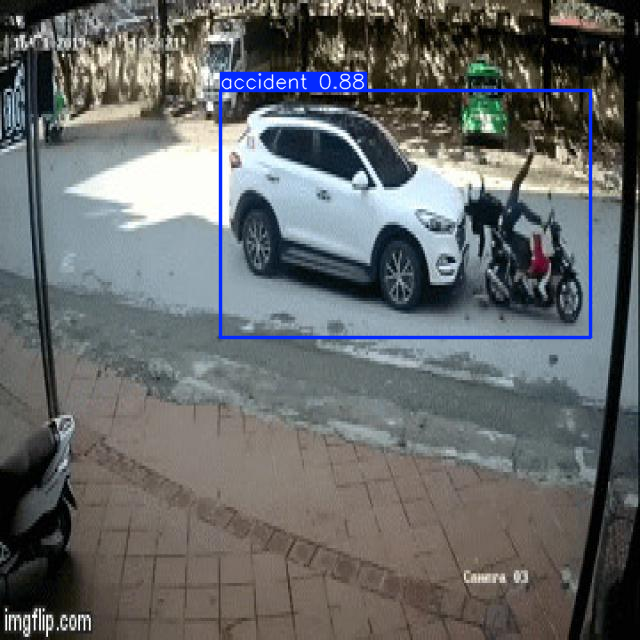

In [ ]:
results = model.predict(source="/content/bike_accident-3/valid/images/accident-197-_jpg.rf.c3e89e864431fe4a95e21f0dd0c604ea.jpg", save=True, imgsz=640, conf=0.25)
for result in results:
    result.show()


